## **Proyecto de programación "Deep Vision in classification tasks"**

In [ ]:
%%capture
!pip freeze

Hola voy a ejecutar el comando ```!pip freeze``` para cotillear a Google Colab

In [ ]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.8.0'

#### **- Cargando el conjunto de datos**

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=748fcc8ac52e0a022e8ef1470c4f55ef0ec672d7f8f243be3ac9109397e79cbb
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juankyep","key":"4b1baf860edb1438375ef56e737ec3bd"}'}

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                                 408KB  2022-04-03 09:25:39           8615       1171  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           1041         42  0.9411765        
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education       6KB  2022-04-16 04:46:28           5762        145  1.0              
muratkokludataset/rice-image-d

In [ ]:
!kaggle competitions download -c the-nature-conservancy-fisheries-monitoring

100% 2.11G/2.11G [00:57<00:00, 58.7MB/s]
100% 2.11G/2.11G [00:57<00:00, 39.1MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip the-nature-conservancy-fisheries-monitoring.zip -d my_dataset

Archive:  the-nature-conservancy-fisheries-monitoring.zip
  inflating: my_dataset/sample_submission_stg1.csv.zip  
  inflating: my_dataset/sample_submission_stg2.csv.zip  
  inflating: my_dataset/test_stg1.zip  
  inflating: my_dataset/test_stg2.7z  
  inflating: my_dataset/train.zip    


In [ ]:
# %%capture
!unzip my_dataset/train.zip

Archive:  my_dataset/train.zip
   creating: train/
  inflating: train/.DS_Store         
   creating: __MACOSX/
   creating: __MACOSX/train/
  inflating: __MACOSX/train/._.DS_Store  
   creating: train/ALB/
  inflating: train/ALB/img_00003.jpg  
  inflating: train/ALB/img_00010.jpg  
  inflating: train/ALB/img_00012.jpg  
  inflating: train/ALB/img_00015.jpg  
  inflating: train/ALB/img_00019.jpg  
  inflating: train/ALB/img_00020.jpg  
  inflating: train/ALB/img_00029.jpg  
  inflating: train/ALB/img_00032.jpg  
  inflating: train/ALB/img_00037.jpg  
  inflating: train/ALB/img_00038.jpg  
  inflating: train/ALB/img_00039.jpg  
  inflating: train/ALB/img_00041.jpg  
  inflating: train/ALB/img_00043.jpg  
  inflating: train/ALB/img_00045.jpg  
  inflating: train/ALB/img_00055.jpg  
  inflating: train/ALB/img_00057.jpg  
  inflating: train/ALB/img_00074.jpg  
  inflating: train/ALB/img_00085.jpg  
  inflating: train/ALB/img_00090.jpg  
  inflating: train/ALB/img_00097.jpg  
  inflating: 

In [ ]:
# %%capture
!ls train/

ALB  BET  DOL  LAG  NoF  OTHER	SHARK  YFT


In [ ]:
# Visualizacion de subcarpetas de Train que vienen a ser las etiquetas 
!ls train/ | wc -l

8


# Escritura de datos tomando como referencia un BASE_FOLDER

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creamos las carpetas de Train y Test dentro del directorio de nuestro proyecto creado previamente en Google Drive
!mkdir /content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train
!mkdir /content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test

In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/"

In [ ]:
!ls train/ALB | wc -l

1719


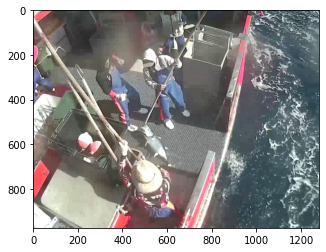

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Escogiendo y mostrando una imagen al azar del conjunto de test

indx = 12
img = cv2.imread('train/ALB/img_00012.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
import os
categorias = []
categorias = os.listdir('train/')
categorias.remove('.DS_Store')
print(categorias)

['DOL', 'NoF', 'BET', 'SHARK', 'LAG', 'YFT', 'OTHER', 'ALB']


In [ ]:
# Creacion de subdirectorios por cada categoria con sus respectivas imagenes
import shutil
from PIL import Image

imagenes = []
labels = []

# Generando subcarpetas con imagenes  por cada categoria 
idx = 0
for cat in categorias:
    parent_dir = BASE_FOLDER + "Train/"
    path = os.path.join(parent_dir, cat)
    print(path)
    os.mkdir(path)
    # creamos las imagenes para el entranamiento redimensionandolos
    for imagen in os.listdir('train/' + cat):
      img = cv2.imread(os.path.join('train/' + cat, imagen))
      img = cv2.resize(img, (200,200))
      cv2.imwrite(path + '/' + imagen, img)
      img = np.asarray(img)
      imagenes.append(img)
      labels.append(idx)  
    idx += 1


/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/DOL
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/NoF
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/BET
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/SHARK
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/LAG
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/YFT
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/OTHER
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/ALB


In [ ]:
# Generando datos con etiquetas a partir de imagenes  por cada categoria para el test
x_test =[]
y_test =[]

idx = 0
for cat in categorias:
    parent_dir = BASE_FOLDER + "Test/"
    path = os.path.join(parent_dir, cat)
    print(path)
    os.mkdir(path)
    shuf = np.random.permutation(os.listdir('train/' + cat))
    # creamos imagenes de test en sus subdirectorios por categorias
    for i in range(int(len(shuf) / 10)):
      img = cv2.imread(os.path.join('train/' + cat, shuf[i]))
      img = cv2.resize(img, (200,200))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      cv2.imwrite(path + '/' + shuf[i], img)
      os.remove(os.path.join(BASE_FOLDER + 'Train/' + cat , shuf[i]))
      img = np.asarray(img)
      x_test.append(img)
      y_test.append(idx)
    idx += 1


/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/DOL
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/NoF
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/BET
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/SHARK
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/LAG
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/YFT
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/OTHER
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Test/ALB


In [ ]:
# # Generando datos de entrenamiento extrayendo del directory Train/ 
x_train = []
y_train = []

# # Generando dataset de entrenamiento con etiqutas (x_test, y_test)   
idx = 0
for cat in categorias:
    parent_dir = BASE_FOLDER + "Train/"
    path = os.path.join(parent_dir, cat)
    print(path)
    for imagen in os.listdir(path):
      img = cv2.imread(os.path.join(path, imagen))
      img = cv2.resize(img, (200,200))
      img = np.asarray(img)
      x_train.append(img)
      y_train.append(idx)  
    idx += 1  

/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/DOL
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/NoF
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/BET
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/SHARK
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/LAG
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/YFT
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/OTHER
/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/Train/ALB


In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape) 

(3404, 200, 200, 3)
(3404,)
(373, 200, 200, 3)
(373,)


# Verificando las imagenes 

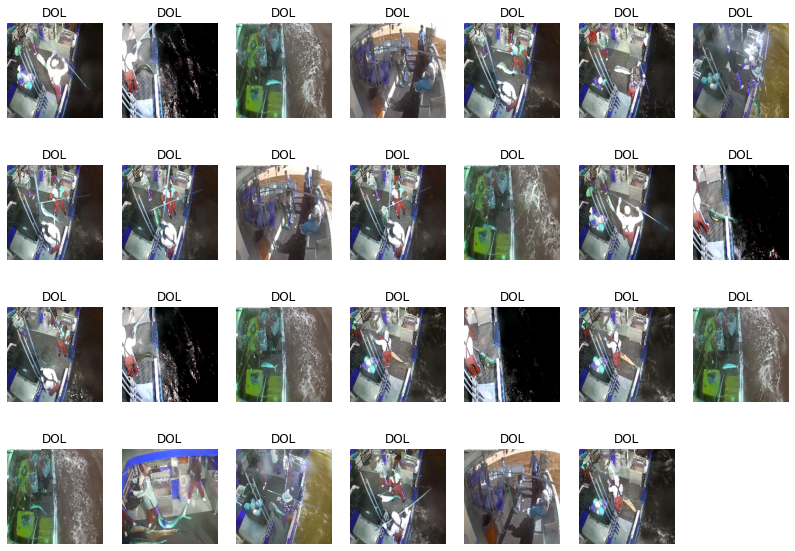

In [ ]:
fig = plt.figure(figsize=(14,10))
for i in range(1, 28):
  fig.add_subplot(4,7,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagenes[i])
  plt.title(categorias[labels[i]])
  plt.axis('off')


In [ ]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC
#¿Que pasa si empleo labels con etiquetas número entero?
print(y_train[0])
#y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
#y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia

print(x_tr.shape)
print(x_val.shape)
print(x_te.shape)


0
(3063, 200, 200, 3)
(341, 200, 200, 3)
(373, 200, 200, 3)


In [ ]:
print(y_val.shape)

(341,)


# CREANDO TOPOLOGIA DE RED NEURONAL (CNN) Y ENTRENANDOLA

In [ ]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
convnet.add(layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))

convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))

convnet.add(layers.Conv2D(64,(3,3),activation='relu'))

#TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64,activation='relu'))
convnet.add(layers.Dense(8,activation='softmax'))

In [ ]:
convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [ ]:
convnet.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               #loss='categorical_crossentropy', #If labels are one-hot encoded
               metrics=['accuracy'])

In [ ]:
H = convnet.fit(x_tr, y_tr, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
48/48 [==============================] - 19s 132ms/step - loss: 1.6318 - accuracy: 0.5021 - val_loss: 1.1280 - val_accuracy: 0.5689
Epoch 2/5
48/48 [==============================] - 4s 82ms/step - loss: 0.7243 - accuracy: 0.7578 - val_loss: 0.6046 - val_accuracy: 0.8358
Epoch 3/5
48/48 [==============================] - 4s 82ms/step - loss: 0.3082 - accuracy: 0.9053 - val_loss: 0.3920 - val_accuracy: 0.9003
Epoch 4/5
48/48 [==============================] - 4s 82ms/step - loss: 0.1196 - accuracy: 0.9660 - val_loss: 0.3851 - val_accuracy: 0.9267
Epoch 5/5
48/48 [==============================] - 4s 82ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.4177 - val_accuracy: 0.9208


#  Observando el proceso de entrenamiento para tomar decisiones

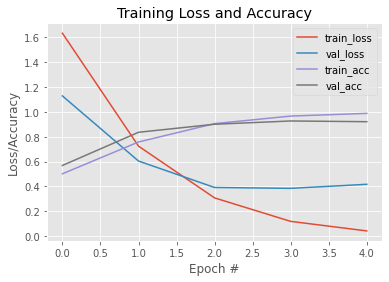

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo

In [ ]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = convnet.predict(x_te, batch_size=128)
#print(y_te[0])
#print(predictions[0])
print(classification_report(y_test, predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.87      0.87      0.87        46
           2       1.00      0.95      0.97        20
           3       1.00      0.88      0.94        17
           4       1.00      1.00      1.00         6
           5       0.91      0.97      0.94        73
           6       1.00      0.90      0.95        29
           7       0.95      0.96      0.96       171

    accuracy                           0.94       373
   macro avg       0.97      0.92      0.94       373
weighted avg       0.94      0.94      0.94       373



In [ ]:
print(convnet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [ ]:

path = os.path.join(BASE_FOLDER, 'MODELO')
os.mkdir(path)
convnet.save(path + '/modelo.h5')
convnet.save_weights(path + '/pesos.h5')

#   PREDICCION

In [ ]:

# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/"
import os
categorias = []
categorias = os.listdir(BASE_FOLDER + 'Train')
print(categorias)

['DOL', 'NoF', 'BET', 'SHARK', 'LAG', 'YFT', 'OTHER', 'ALB']


In [ ]:
from matplotlib.font_manager import list_fonts
import numpy as np
import cv2
from keras.models import load_model

modelo = BASE_FOLDER + 'MODELO/modelo.h5'
pesos = BASE_FOLDER + 'MODELO/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos)
list_img =[]
test_stg = []
shuf = np.random.permutation(os.listdir(BASE_FOLDER + 'test_stg1/'))
for i in range(10):
      list_img.append(shuf[i])
      img = cv2.imread(os.path.join(BASE_FOLDER + 'test_stg1/', shuf[i]))
      img = cv2.resize(img, (200,200))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = np.asarray(img)
      test_stg.append(img)
test_stg = np.asarray(test_stg)
arreglo = cnn.predict(test_stg)
print( test_stg.shape)

(10, 200, 200, 3)


In [ ]:
print( test_stg.shape[0])

10


In [ ]:
list_respuesta = []
list_resultado = []
for i in range(len(arreglo)):
    resultado = arreglo[i]  
    respuesta = categorias[np.argmax(resultado)]   
    list_img.append(resultado)
    list_respuesta.append(respuesta) 
    list_resultado.append(np.argmax(resultado))   
print(list_respuesta, list_resultado )
 

['YFT', 'NoF', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB'] [5, 1, 7, 7, 7, 7, 7, 7, 7, 7]


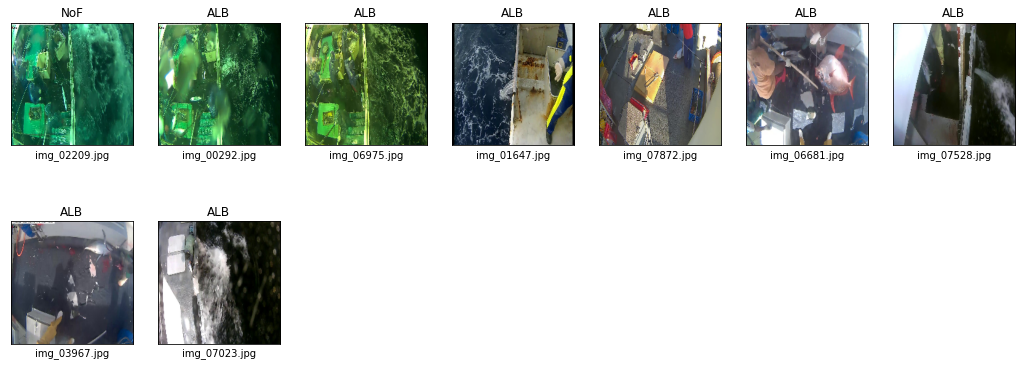

In [ ]:
# Visualizacion de imagenes predecidas
import matplotlib.pyplot as plt
fig_stg = plt.figure(figsize=(18,14))

for i in range(1, 10):
  fig_stg.add_subplot(4,7,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_stg[i])
  plt.title(list_respuesta[i])
  plt.xlabel(list_img[i])
  # plt.axis('off')
plt.show()
# print(resultado)

In [ ]:

name_IPYNB_file = '12MBID_Proyecto_Programacion_Entrega1.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )





[NbConvertApp] Converting notebook /content/drive/MyDrive/12MBID_Proyecto_Programacion_Colab/my_dataset/12MBID_Proyecto_Programacion_Entrega1.ipynb to pdf
[NbConvertApp] Support files will be in 12MBID_Proyecto_Programacion_Entrega1_files/
[NbConvertApp] Making directory ./12MBID_Proyecto_Programacion_Entrega1_files
[NbConvertApp] Making directory ./12MBID_Proyecto_Programacion_Entrega1_files
[NbConvertApp] Making directory ./12MBID_Proyecto_Programacion_Entrega1_files
[NbConvertApp] Making directory ./12MBID_Proyecto_Programacion_Entrega1_files
[NbConvertApp] Writing 225683 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1024810 bytes to /content/drive/MyDrive/12MBID_Proyecto_Programaci